In [1]:
import sys
import gc

from utils import utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

from fast_ml.feature_engineering import FeatureEngineering_DateTime


In [2]:
schema={
    'duration':'float64',
    'start_lat':'float64',
    'start_lon':'float64',
    'end_lat':'float64',
    'end_lon':'float64',
    'bike_id':'category',
    'plan_duration':'category',
    'trip_route_category':'category',
    'passholder_type':'category',
    'start_station':'category',
    'end_station':'category'
}

dates=['start_time', 'end_time']

df=pd.read_csv('/workspace/data/train_set_cleaned_no_out.csv', index_col='trip_id', dtype=schema, parse_dates=dates)

In [3]:
df

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
101750280,35.0,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
46560345,32.0,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
120016336,6.0,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
129547190,138.0,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
136619463,14.0,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83666862,17.0,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220
132547303,9.0,2019-11-12 16:49:10,2019-11-12 16:58:51,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014
67332628,6.0,2018-01-13 15:49:00,2018-01-13 15:55:00,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007


In [4]:
### Encoding
#Instantiate
dt_fe = FeatureEngineering_DateTime()
datetime_vars=['start_time', 'end_time']
dt_fe.fit(df, datetime_variables=datetime_vars, prefix = 'default')
df = dt_fe.transform(df)

/usr/local/lib/python3.9/dist-packages/fast_ml/feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)
/usr/local/lib/python3.9/dist-packages/fast_ml/feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


In [50]:
df.T

trip_id,101750280,46560345,120016336,129547190,136619463,63406498,25033469,107479459,132750788,107465757,...,141032007,50235548,149058739,127848325,14657672,83666862,132547303,67332628,114846232,167744702
duration,35.0,32.0,6.0,138.0,14.0,30.0,11.0,15.0,19.0,8.0,...,27.0,2.0,64.0,134.0,3.0,17.0,9.0,6.0,3.0,59.0
start_time,2018-08-07 11:20:00,2017-09-17 17:51:00,2019-04-22 09:22:00,2019-09-22 11:27:00,2020-01-31 17:11:00,2017-12-16 15:18:00,2017-04-15 22:02:00,2018-10-16 17:27:00,2019-11-16 11:24:27,2018-10-16 12:05:00,...,2020-04-18 11:40:00,2017-10-06 15:07:00,2020-10-23 22:27:00,2019-08-24 12:52:00,2016-11-28 18:39:00,2018-04-25 18:32:00,2019-11-12 16:49:10,2018-01-13 15:49:00,2019-02-04 14:16:00,2021-08-01 20:26:00
end_time,2018-08-07 11:55:00,2017-09-17 18:23:00,2019-04-22 09:28:00,2019-09-22 13:45:00,2020-01-31 17:25:00,2017-12-16 15:48:00,2017-04-15 22:13:00,2018-10-16 17:42:00,2019-11-16 11:43:49,2018-10-16 12:13:00,...,2020-04-18 12:07:00,2017-10-06 15:09:00,2020-10-23 23:31:00,2019-08-24 15:06:00,2016-11-28 18:42:00,2018-04-25 18:49:00,2019-11-12 16:58:51,2018-01-13 15:55:00,2019-02-04 14:19:00,2021-08-01 21:25:00
start_lat,33.74892,34.035679,34.04607,34.06258,34.026291,34.13525,34.045181,34.04113,34.046822,34.052872,...,34.092491,34.048401,34.014309,33.99556,34.0485,34.049889,34.039188,34.049889,34.045181,33.984341
start_lon,-118.275192,-118.270813,-118.233093,-118.290092,-118.277687,-118.13237,-118.250237,-118.267982,-118.248352,-118.24749,...,-118.291443,-118.26094,-118.491341,-118.481552,-118.258537,-118.255882,-118.232529,-118.255882,-118.250237,-118.47155
end_lat,33.74892,34.047749,34.047749,34.059689,34.02166,34.13525,34.05357,34.045422,34.046822,34.04607,...,34.092491,34.0485,34.014309,33.984341,34.042061,34.074829,34.05661,34.05048,34.04554,34.023392
end_lon,-118.275192,-118.243172,-118.243172,-118.294662,-118.278687,-118.13237,-118.266357,-118.253517,-118.248352,-118.233093,...,-118.291443,-118.25853,-118.491341,-118.47155,-118.263382,-118.258728,-118.237213,-118.254593,-118.256668,-118.479637
bike_id,06530,6683,06710,17068,18841,05768,06527,06333,19855,05926,...,5845,12220,18590,16224,06267,06505,18348,05718,12195,16201
plan_duration,1.0,0.0,30.0,1.0,30.0,0.0,30.0,1.0,30.0,1.0,...,1.0,30.0,30.0,1.0,30.0,30.0,30.0,365.0,1.0,1.0
trip_route_category,Round Trip,One Way,One Way,One Way,One Way,Round Trip,One Way,One Way,Round Trip,One Way,...,Round Trip,One Way,Round Trip,One Way,One Way,One Way,One Way,One Way,One Way,One Way


In [51]:
df.groupby(['passholder_type', 'trip_route_category']).count()

duration  start_time  end_time  \
passholder_type trip_route_category                                   
Annual Pass     One Way                 30431       30431     30431   
                Round Trip               2542        2542      2542   
Flex Pass       One Way                 10864       10864     10864   
                Round Trip                556         556       556   
Monthly Pass    One Way                352339      352339    352339   
                Round Trip              34940       34940     34940   
One Day Pass    One Way                 27919       27919     27919   
                Round Trip              11969       11969     11969   
Walk-up         One Way                138350      138350    138350   
                Round Trip              65517       65517     65517   

                                     start_lat  start_lon  end_lat  end_lon  \
passholder_type trip_route_category                                           
Annual Pass     One Way                  30431      30431    30431    30431   
                Round Trip                2542       2542     2542     2542   
Flex Pass       One Way                  10864      10864    10864    10864   
                Round Trip                 556        556      556      556   
Monthly Pass    One Way                 352339     352339   352339   352339   
                Round Trip               34940      34940    34940    34940   
One Day Pass    One Way                  27919      27919    27919    27919   
                Round Trip               11969      11969    11969    11969   
Walk-up         One Way                 138350     138350   138350   138350   
                Round Trip               65517      65517    65517    65517   

                                     bike_id  plan_duration  start_station  \
passholder_type trip_route_category                                          
Annual Pass     One Way                30431          30431          30431   
                Round Trip              2542           2542           2542   
Flex Pass       One Way                10864          10864          10864   
                Round Trip               556            556            556   
Monthly Pass    One Way               352339         352339         352339   
                Round Trip             34940          34940          34940   
One Day Pass    One Way                27919          27919          27919   
                Round Trip             11969          11969          11969   
Walk-up         One Way               138350         138350         138350   
                Round Trip             65517          65517          65517   

                                     ...  end_time:is_quarter_end  \
passholder_type trip_route_category  ...                            
Annual Pass     One Way              ...                    30431   
                Round Trip           ...                     2542   
Flex Pass       One Way              ...                    10864   
                Round Trip           ...                      556   
Monthly Pass    One Way              ...                   352339   
                Round Trip           ...                    34940   
One Day Pass    One Way              ...                    27919   
                Round Trip           ...                    11969   
Walk-up         One Way              ...                   138350   
                Round Trip           ...                    65517   

                                     end_time:is_quarter_start  \
passholder_type trip_route_category                              
Annual Pass     One Way                                  30431   
                Round Trip                                2542   
Flex Pass       One Way                                  10864   
                Round Trip                                 556   
Monthly Pass    One Way                                 352339   
       

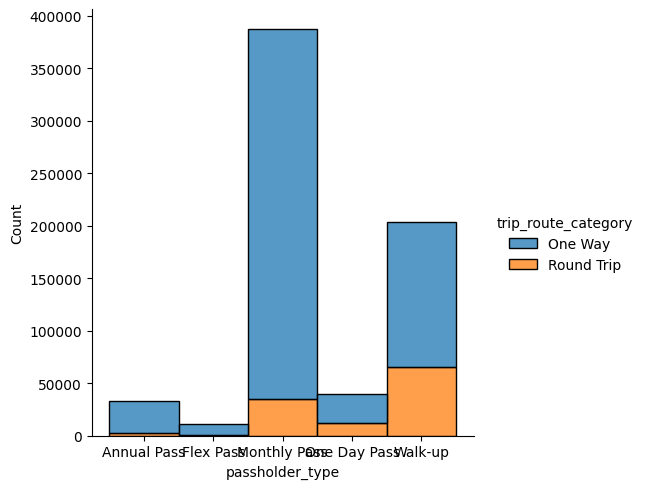

In [52]:
sns.displot(data=df, x="passholder_type", hue="trip_route_category", multiple="stack")

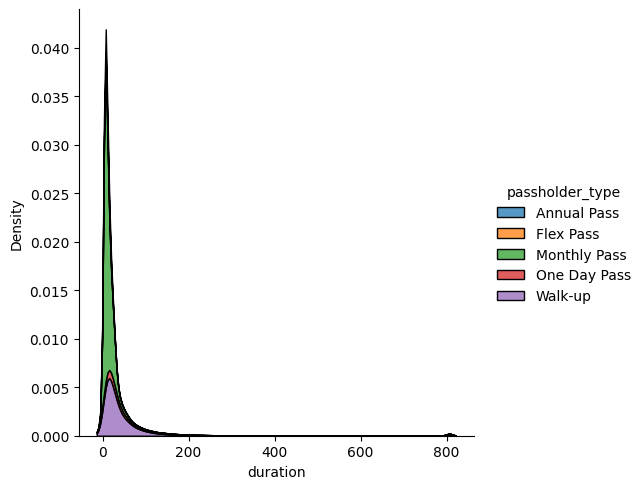

In [53]:
sns.displot(data=df, x="duration", hue="passholder_type", multiple="stack", kind='kde')

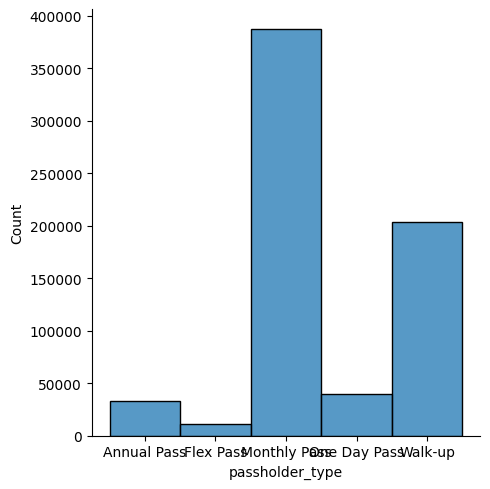

In [74]:
sns.displot(data=df, x="passholder_type")

In [77]:
df_X = df.loc[:, (df.columns != 'passholder_type')]
df_y = df.loc[:, 'passholder_type']

In [78]:
# transform the dataset
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(df_X, df_y)

TypeError: Cannot cast DatetimeArray to dtype float64

In [70]:
# summarize class distribution
counter = Counter(df_X)
print(counter)

Counter({'duration': 1, 'start_time': 1, 'end_time': 1, 'start_lat': 1, 'start_lon': 1, 'end_lat': 1, 'end_lon': 1, 'bike_id': 1, 'plan_duration': 1, 'trip_route_category': 1, 'start_station': 1, 'end_station': 1, 'start_time:year': 1, 'start_time:quarter': 1, 'start_time:month': 1, 'start_time:day': 1, 'start_time:day_of_week': 1, 'start_time:day_of_year': 1, 'start_time:weekofyear': 1, 'start_time:is_month_end': 1, 'start_time:is_month_start': 1, 'start_time:is_quarter_end': 1, 'start_time:is_quarter_start': 1, 'start_time:is_year_end': 1, 'start_time:is_year_start': 1, 'start_time:time': 1, 'start_time:hour': 1, 'start_time:minute': 1, 'start_time:second': 1, 'start_time:is_weekend': 1, 'start_time:day_part': 1, 'end_time:year': 1, 'end_time:quarter': 1, 'end_time:month': 1, 'end_time:day': 1, 'end_time:day_of_week': 1, 'end_time:day_of_year': 1, 'end_time:weekofyear': 1, 'end_time:is_month_end': 1, 'end_time:is_month_start': 1, 'end_time:is_quarter_end': 1, 'end_time:is_quarter_sta

In [71]:
counter.items()

dict_items([('duration', 1), ('start_time', 1), ('end_time', 1), ('start_lat', 1), ('start_lon', 1), ('end_lat', 1), ('end_lon', 1), ('bike_id', 1), ('plan_duration', 1), ('trip_route_category', 1), ('start_station', 1), ('end_station', 1), ('start_time:year', 1), ('start_time:quarter', 1), ('start_time:month', 1), ('start_time:day', 1), ('start_time:day_of_week', 1), ('start_time:day_of_year', 1), ('start_time:weekofyear', 1), ('start_time:is_month_end', 1), ('start_time:is_month_start', 1), ('start_time:is_quarter_end', 1), ('start_time:is_quarter_start', 1), ('start_time:is_year_end', 1), ('start_time:is_year_start', 1), ('start_time:time', 1), ('start_time:hour', 1), ('start_time:minute', 1), ('start_time:second', 1), ('start_time:is_weekend', 1), ('start_time:day_part', 1), ('end_time:year', 1), ('end_time:quarter', 1), ('end_time:month', 1), ('end_time:day', 1), ('end_time:day_of_week', 1), ('end_time:day_of_year', 1), ('end_time:weekofyear', 1), ('end_time:is_month_end', 1), ('e

In [61]:

# scatter plot of examples by class label
for label, _ in counter.items():
    print(label, _)

    row_ix = np.where(y == label)[0]
    plt.scatter(df[row_ix, 0], df[row_ix, 1], label=str(label))

#plt.legend()
#plt.show()

duration 1
start_time 1
end_time 1
start_lat 1
start_lon 1
end_lat 1
end_lon 1
bike_id 1
plan_duration 1
trip_route_category 1
passholder_type 1
start_station 1
end_station 1
start_time:year 1
start_time:quarter 1
start_time:month 1
start_time:day 1
start_time:day_of_week 1
start_time:day_of_year 1
start_time:weekofyear 1
start_time:is_month_end 1
start_time:is_month_start 1
start_time:is_quarter_end 1
start_time:is_quarter_start 1
start_time:is_year_end 1
start_time:is_year_start 1
start_time:time 1
start_time:hour 1
start_time:minute 1
start_time:second 1
start_time:is_weekend 1
start_time:day_part 1
end_time:year 1
end_time:quarter 1
end_time:month 1
end_time:day 1
end_time:day_of_week 1
end_time:day_of_year 1
end_time:weekofyear 1
end_time:is_month_end 1
end_time:is_month_start 1
end_time:is_quarter_end 1
end_time:is_quarter_start 1
end_time:is_year_end 1
end_time:is_year_start 1
end_time:time 1
end_time:hour 1
end_time:minute 1
end_time:second 1
end_time:is_weekend 1
end_time:day_